# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [77]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [78]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/Unsupervised/stock_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

In [79]:
#First 10 rows of the dataset
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [80]:
#Last 10 rows of the dataset
data.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


In [81]:
#Shape of the dataset
data.shape

(340, 15)

**Observation:**
The dataset contains 340 rows & 15 columns

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Observation:**

1) There is no missing data in the dataset.

2) The dataset contains 7 Float type, 4 Integer type & 4 Object type columns.

In [83]:
#Statistical summary of the Dataset
data.describe()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,1274.949951,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,50.090000,6.159292e+09,528.039074,129.064585


**Observation:**

1) The average current price of stock is 80.86$.

2) Almost 75% of stocks have a percentage change in stock price in 13 weeks is below 10.69%.

3) The maximum earnings per share is 50.09$.

4) The minimum P/E ratio is 2.935.

5)There is wide difference between the mean & median in Current price, ROE,Cash ratio,Net cash flow,Net income , Estimate Shares Outstanding & P/E ratio implying the presence of outliers in these data.


In [84]:
#Checking for duplicates
data.duplicated().sum()

0

**Observation:**
There are no duplicated rows in the dataset.

In [85]:
#Checking for missing values.
data.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

**Observation:**
There are no missing values in the dataset.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### **Univariate Analysis**

In [86]:
#copying the dataframe
df=data.copy()

In [87]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [88]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Observation on Current Price**

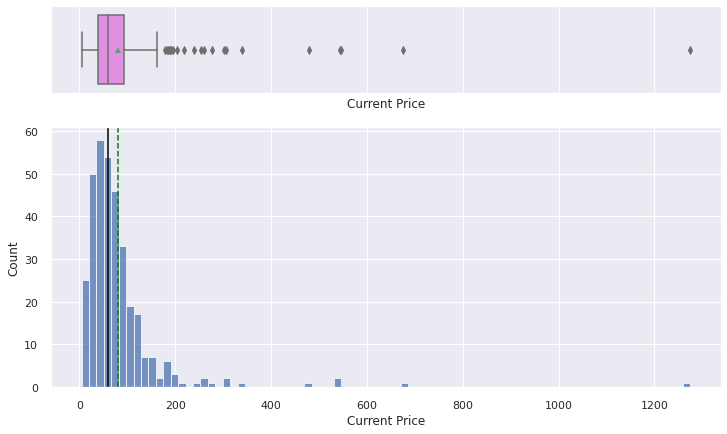

In [89]:
histogram_boxplot(df,'Current Price')

**Observation:**

- The data contains upper outliers & is slightly right skewed.


**Observation on Price change**

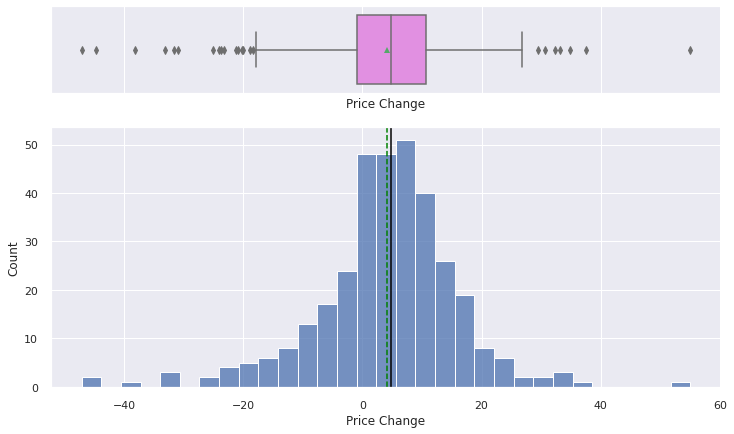

In [90]:
histogram_boxplot(df,'Price Change')

**Observation:**

- The data is uniformly distributed & has outliers on both extremities.

**Observation on Volatility**

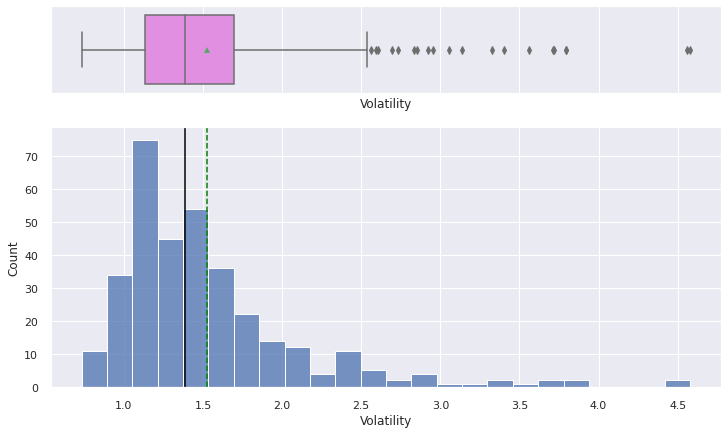

In [91]:
histogram_boxplot(df,'Volatility')

**Observation:**

- The data is right skewed with upper outliers.

**Observation on ROE**

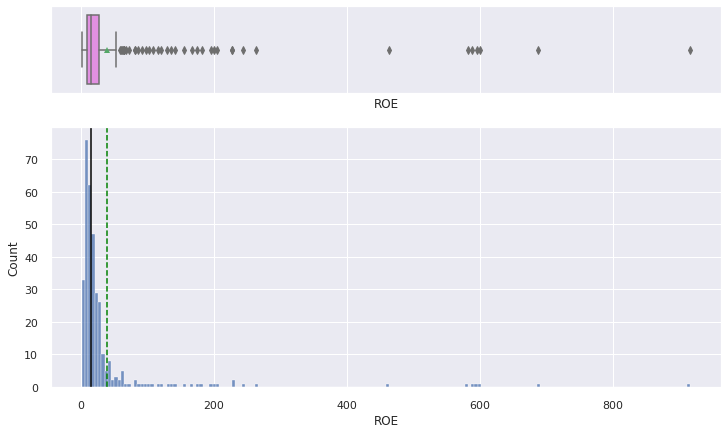

In [92]:
histogram_boxplot(df,'ROE')

**Observation:**

- The data is right skewed with upper outliers.

**Observation on Net Cash Flow**

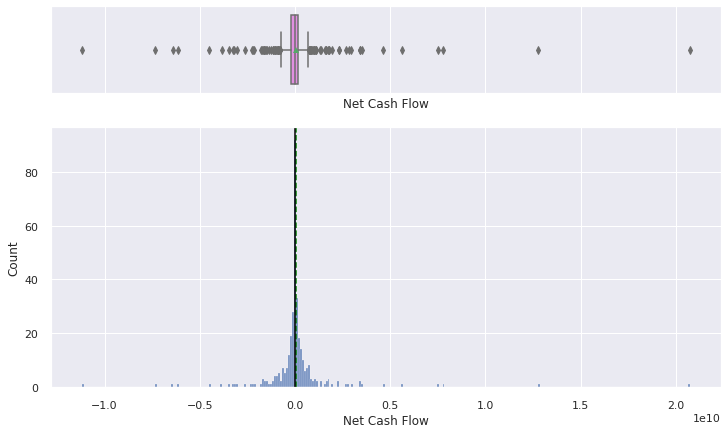

In [93]:
histogram_boxplot(df,'Net Cash Flow')

**Observation:**

- The data is uniformily distributed with outliers on beyond both extremities.

**Observation on Net Income**

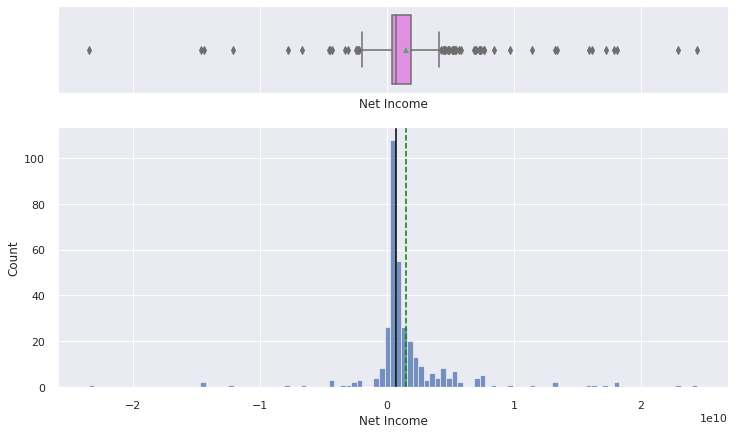

In [94]:
histogram_boxplot(df,'Net Income')

**Observation:**

- The data is almost uniformily distributed with outliers beyond both extremities.

**Observation on Earnings Per Share**

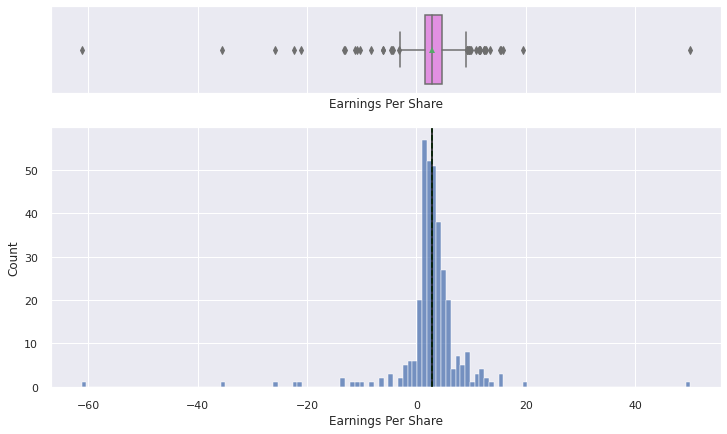

In [95]:
histogram_boxplot(df,'Earnings Per Share')

**Observation:**

Here, the data is uniformly distributed with outliers beyond both extremities.

**Observation on Estimated Shares Outstanding**

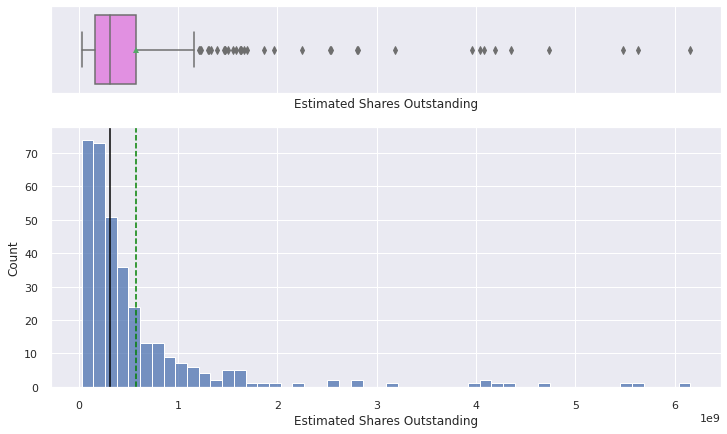

In [96]:
histogram_boxplot(df,'Estimated Shares Outstanding')

**Observation:**

- The data is right skewed with extreme upper outliers.

**Observation on P/E ratio**

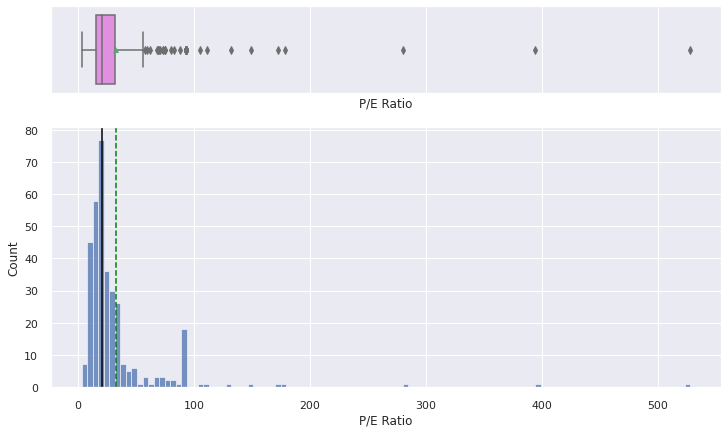

In [97]:
histogram_boxplot(df,'P/E Ratio')

**Observation:**

-The data is right skewed with upper outliers.

**Observation on P/B ratio**

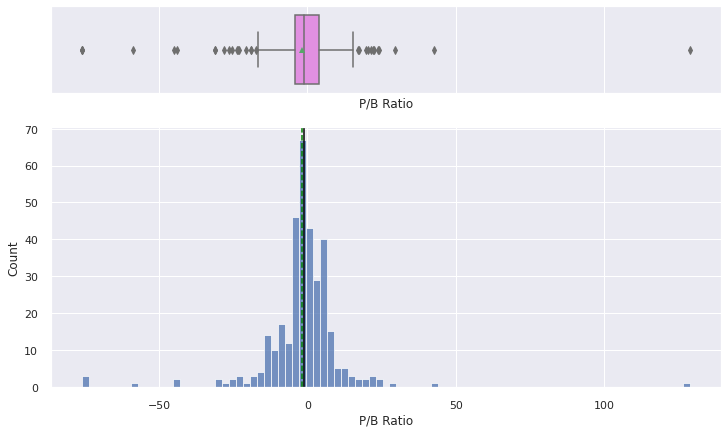

In [98]:
histogram_boxplot(df,'P/B Ratio')

**Observation:**

- The data is uniformily distributed with outliers beyond both extremities.

**Observation on GICS sector**

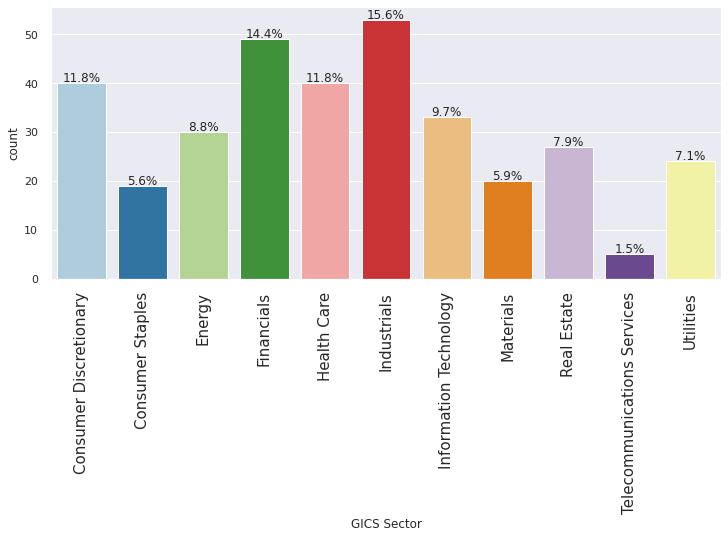

In [99]:
labeled_barplot(df,'GICS Sector',perc=True)

**Observation:**

- 15.6% of the companies belong to the Industrials Sector which is the highest followed by the Financials Sector where no. of companies belonging to this sector is 14.4%.

- The least no. of companies belong to the Telecommunication services which is 1.5%.

**Observation on GICS Sub Industry**

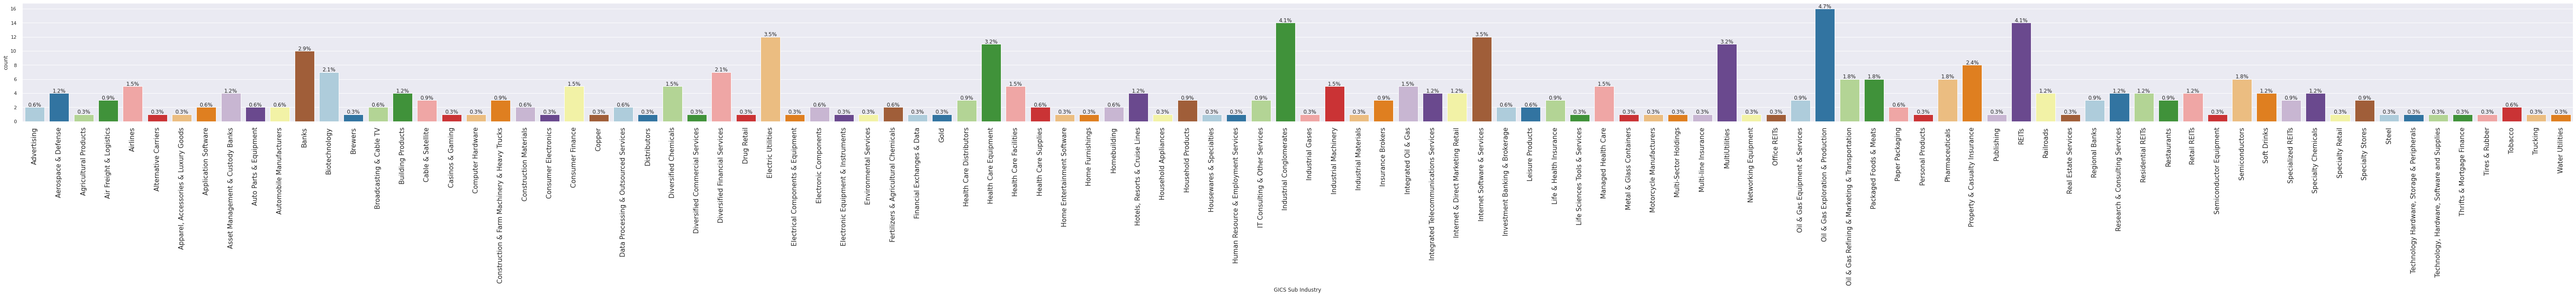

In [100]:
labeled_barplot(df,'GICS Sub Industry',perc=True)

**Observation:**

- 4.7% of the companies belong to the Oil & Gas Refining & Marketing & Transportation followed by REITS & Industrial Conglomerates where the companies contribution to this sub industry sector is 4.1%.



### **Mutivariate Analysis**

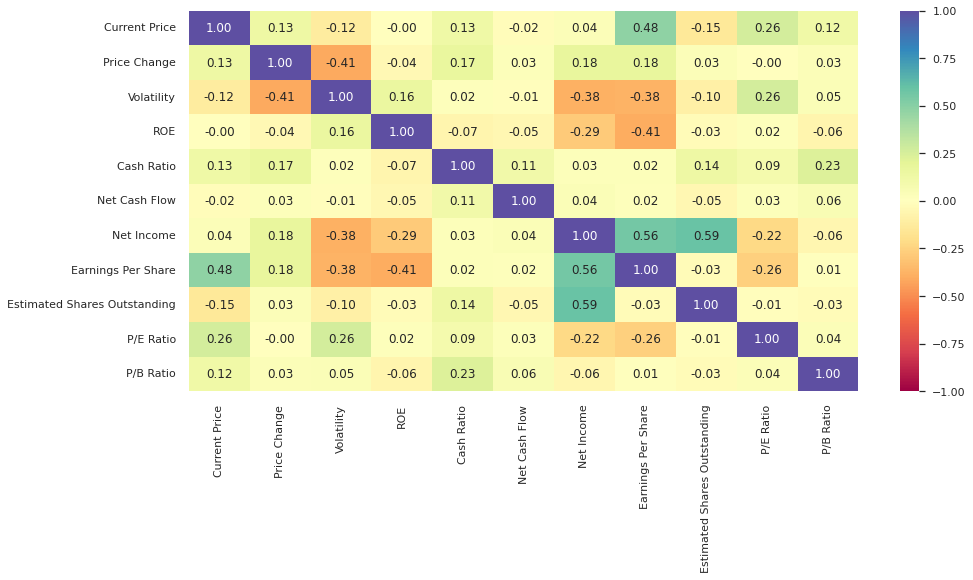

In [101]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

**Observation:**

- There is no high correlation between the independent variables.

### **Bivariate Analysis**

**Relation between GICS Sector & Price change**

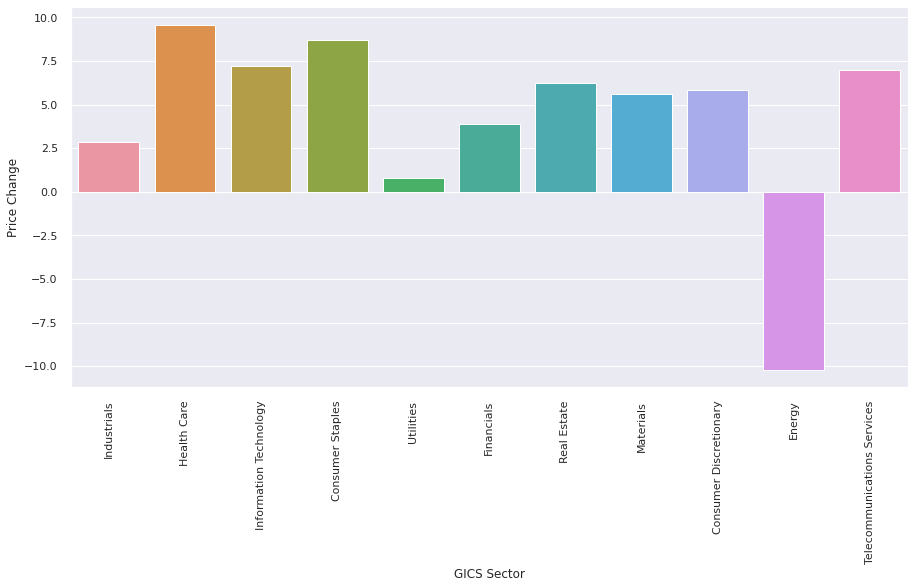

In [102]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='GICS Sector',y='Price Change',ci=False)
plt.xticks(rotation=90)
plt.show()

**Observation:**

- The maximum Price Change can be seen for the companies in Health Care sector & Energy sector by 10 where it has affected positively for the Health Care sector while negatively for the Energy sector.

- The least Price Change is seen for the companies in Utilities which is by 1.

**Relation between GICS Sector and Volatility**

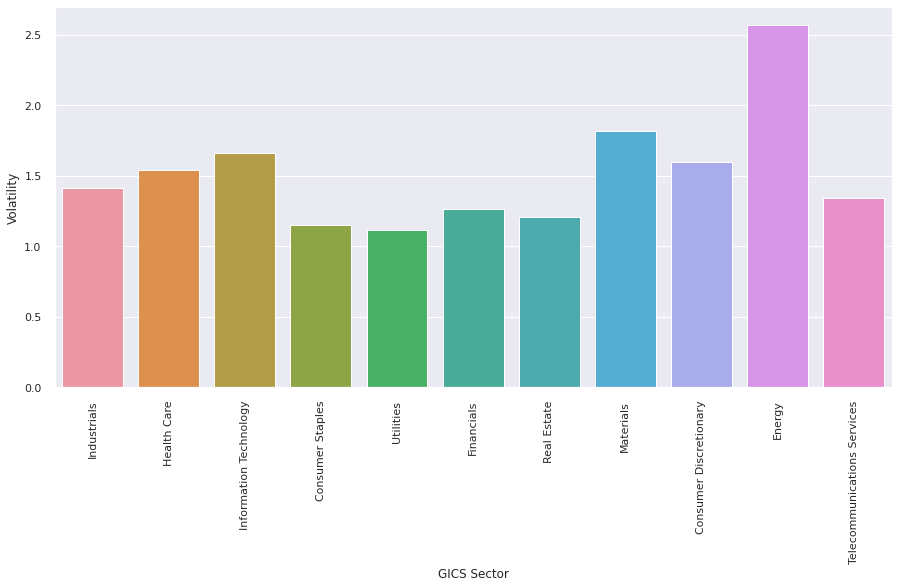

In [103]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='GICS Sector',y='Volatility',ci=False)
plt.xticks(rotation=90)
plt.show()

**Observation:**

- The Standard deviation of stock price for over 13 weeks is maximum in Energy sector which is appx. 26 while the least is for the Utilities Sector which is appx. 11.

**Realtion between GICS Sector and P/E ratio**

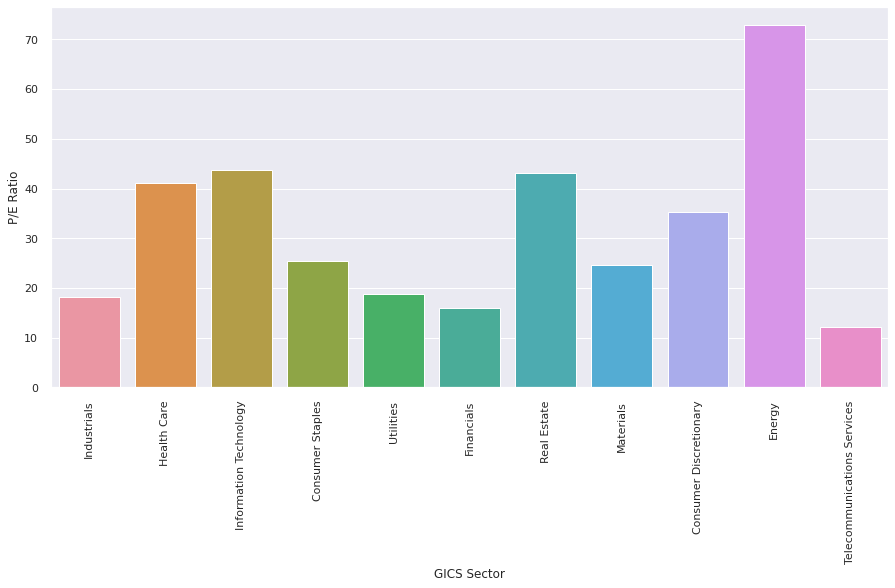

In [104]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='GICS Sector',y='P/E Ratio',ci=False)
plt.xticks(rotation=90)
plt.show()

**Observation:**

- The ratio os current stock price to earnings per share is maximum in the Energy Sector while the least for Telecommuniation services.

**Relation between GICS Sector and Cash Ratio**

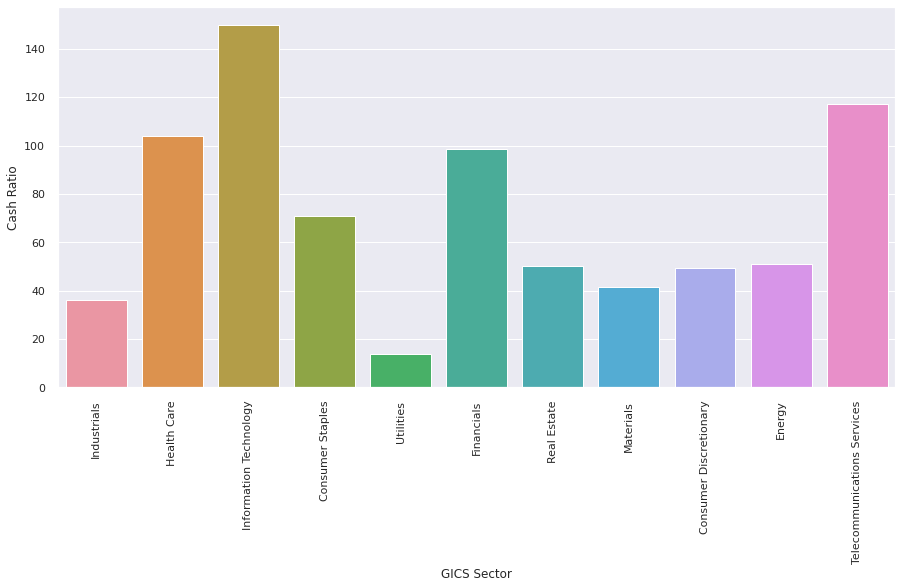

In [105]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='GICS Sector',y='Cash Ratio',ci=False)
plt.xticks(rotation=90)
plt.show()

**Observation:**

- The cash ratio is maximum for the Information Technology Sector while the least is for the Utlities sector.

**Relation between GICS Sector and Net cash flow**

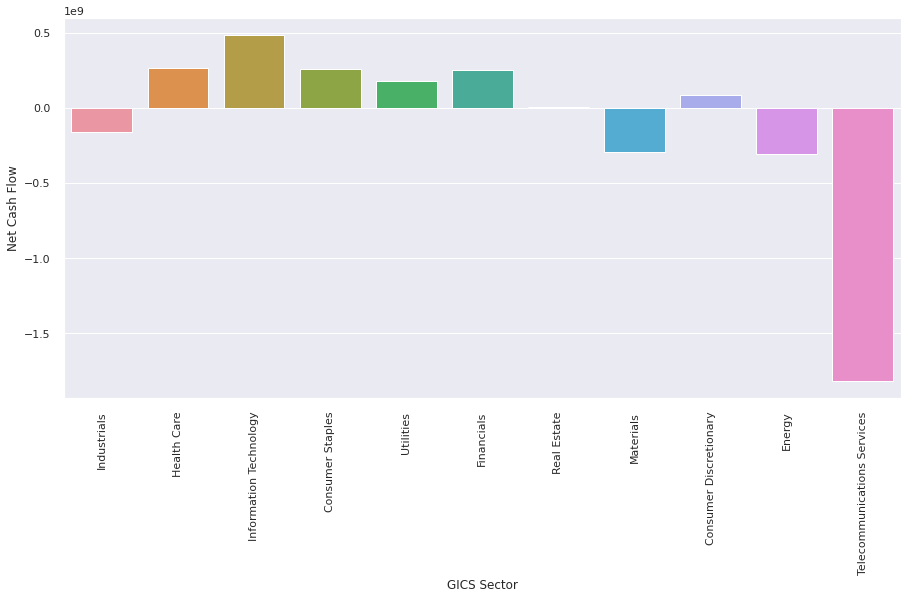

In [106]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='GICS Sector',y='Net Cash Flow',ci=False)
plt.xticks(rotation=90)
plt.show()

**Observation:**

- The Net Cash Flow has highly affected the Telecommunication Services negatively.
- The other companies having a negative Net cash flow is the Energy, Materials & Industrials Sector.
- The positive Net cash flow is highest for the Information Technology Sector.

**Relation between GICS Sector & Earnings Per share**

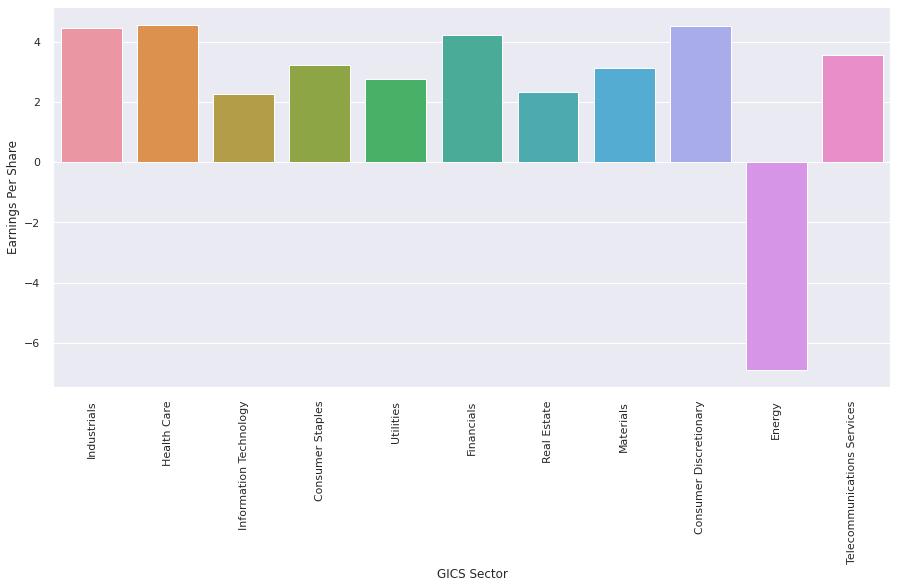

In [107]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='GICS Sector',y='Earnings Per Share',ci=False)
plt.xticks(rotation=90)
plt.show()

**Observation:**

- The Earning per share is maximum in Health Care & Consumer Discretionary Sector at 5 .

- The companies at Energy Sector is having a loss as the Earnings per share is -7.

**Relation between GICS Sector and Net Income**

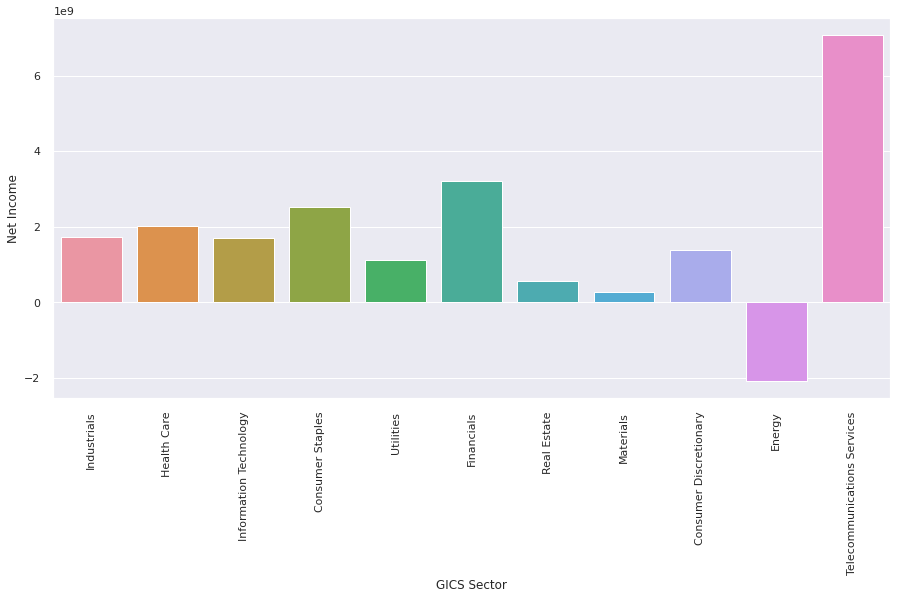

In [108]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='GICS Sector',y='Net Income',ci=False)
plt.xticks(rotation=90)
plt.show()

**Observation:**

- The Net income is maximum in the Telecommunication Services while the net income is negative for the Energy sector.

- The Energy Sector is running at a loss.

**Realtion between GICS Sector and ROE**

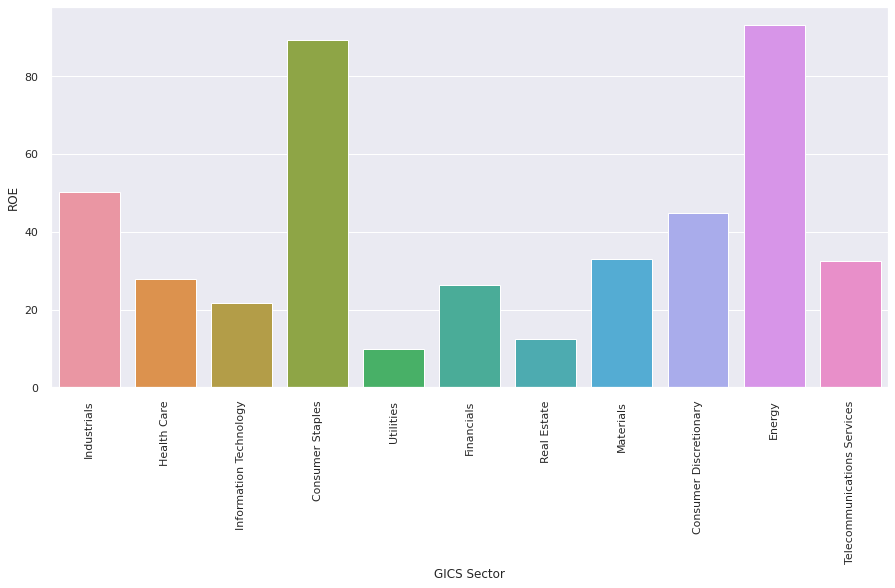

In [109]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='GICS Sector',y='ROE',ci=False)
plt.xticks(rotation=90)
plt.show()

**Observation:**

- The ROE is highest in the Energy & Consumer Staples sector while the least is for the Utilities sector.

- This implies the Utilities sector earns lesser than the Shareholder's equity & the Energy & Consumer Staples sector are efficiently using the Shareholder's equity to generate income.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### **Outlier Check**

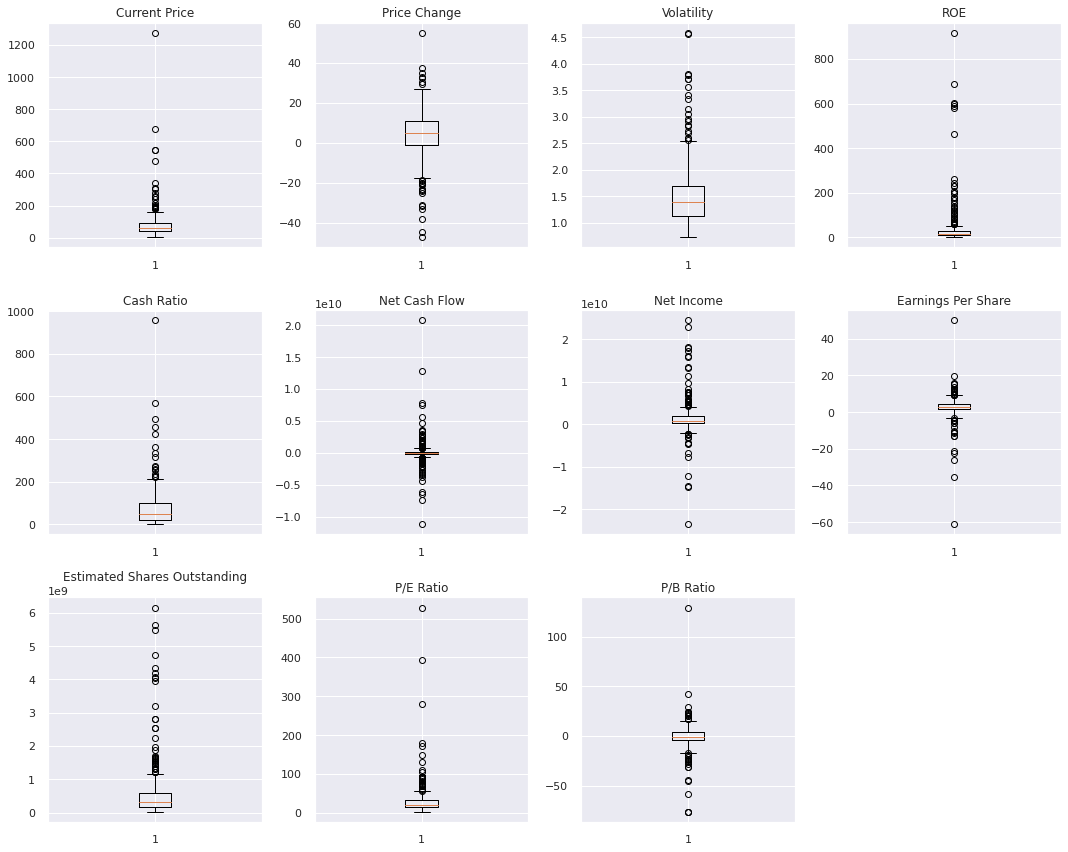

In [110]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation:**
- The outliers are proper values & hence will not be treating them.

### **Scaling**

In [111]:
#Extracting the names of the numerical columns & storing in the num_columns
num_columns = df._get_numeric_data().columns.values.tolist()
num_columns

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [112]:
#Scaling the data for clustering
scaler=StandardScaler()
subset=df[num_columns].copy()
subset_scaled = scaler.fit_transform(subset)

In [113]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196
...,...,...,...,...,...,...,...,...,...,...,...
335,-0.486181,0.901646,0.540121,-0.255142,4.308162,-0.559673,-1.487784,-1.127481,0.429111,-0.082116,0.572194
336,-0.289510,-1.065766,-0.079703,1.062211,-0.476513,0.053235,-0.051186,0.029391,-0.167741,-0.337154,-0.152012
337,0.221913,0.439539,-0.206067,-0.400362,0.332009,0.164889,-0.342467,-0.303532,-0.460058,2.233634,-1.589390
338,-0.547053,-0.436811,-0.097813,-0.369243,0.320933,-0.051022,-0.301171,-0.239684,-0.377852,-0.222714,0.118680


## K-means Clustering

**Checking Elbow Plot**

In [114]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


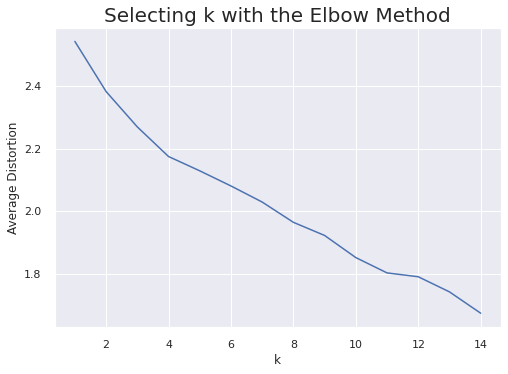

In [115]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**OBSERVATION:**
The appropriate value of k from the elbow method seems to be between 4 & 8.

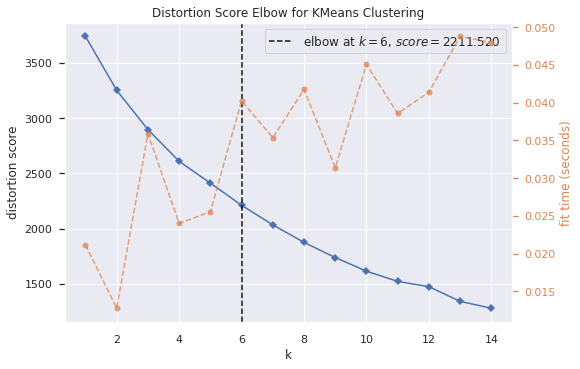

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [116]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**OBSERVATION:**

 From the above visuvalization of the elbow curve, we can conclude the appropriate value of k is 6.

**Checking the Silhouette Score**

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


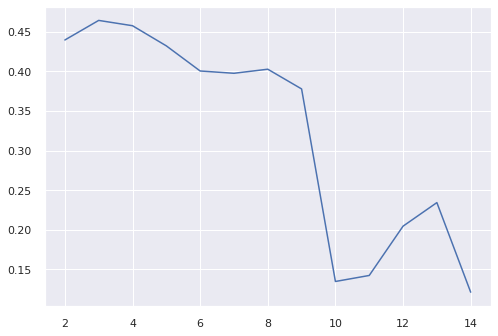

In [117]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**Observation:**
 
 Since the value of the Silhouette score is maximum for 3, we can consider the appropriate value of k to be 3.

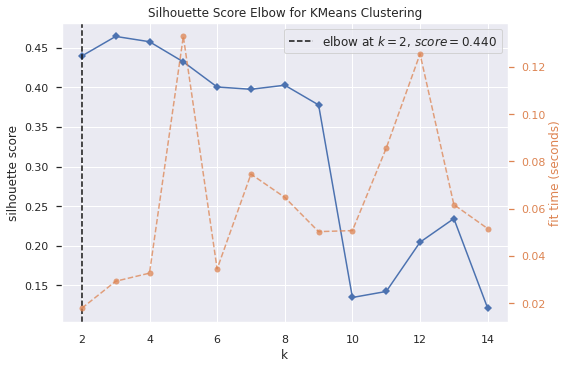

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [118]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Observation:**
- From the above visualization of the Silhouette Score, the proposed appropriate k value is 2.


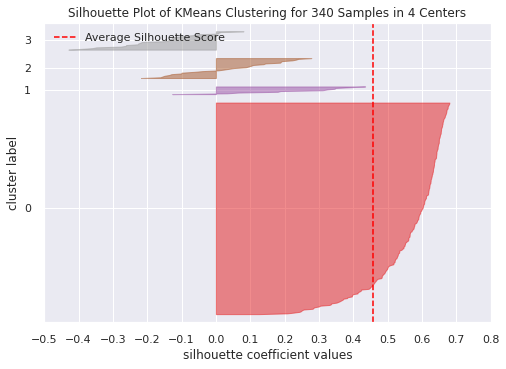

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [135]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

**Observation:**
Since the average value of Silhouette Score is considerably high & as per elbow method there is a knick at 4.Hence, we choose k as 4.

**Final Model**

In [120]:
#making a copy of the dataset
df1=df.copy()

In [136]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [137]:
# adding kmeans cluster labels to the original dataframe
df1["K_means_segments"] = kmeans.labels_

### **Cluster Profiling**

In [214]:
cluster_profile = df1.groupby("K_means_segments").mean()

In [215]:
cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Security"].count().values
)

In [216]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)
#cluster_profile.style.highlight_min(color='red',axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25
1,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
2,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
3,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277


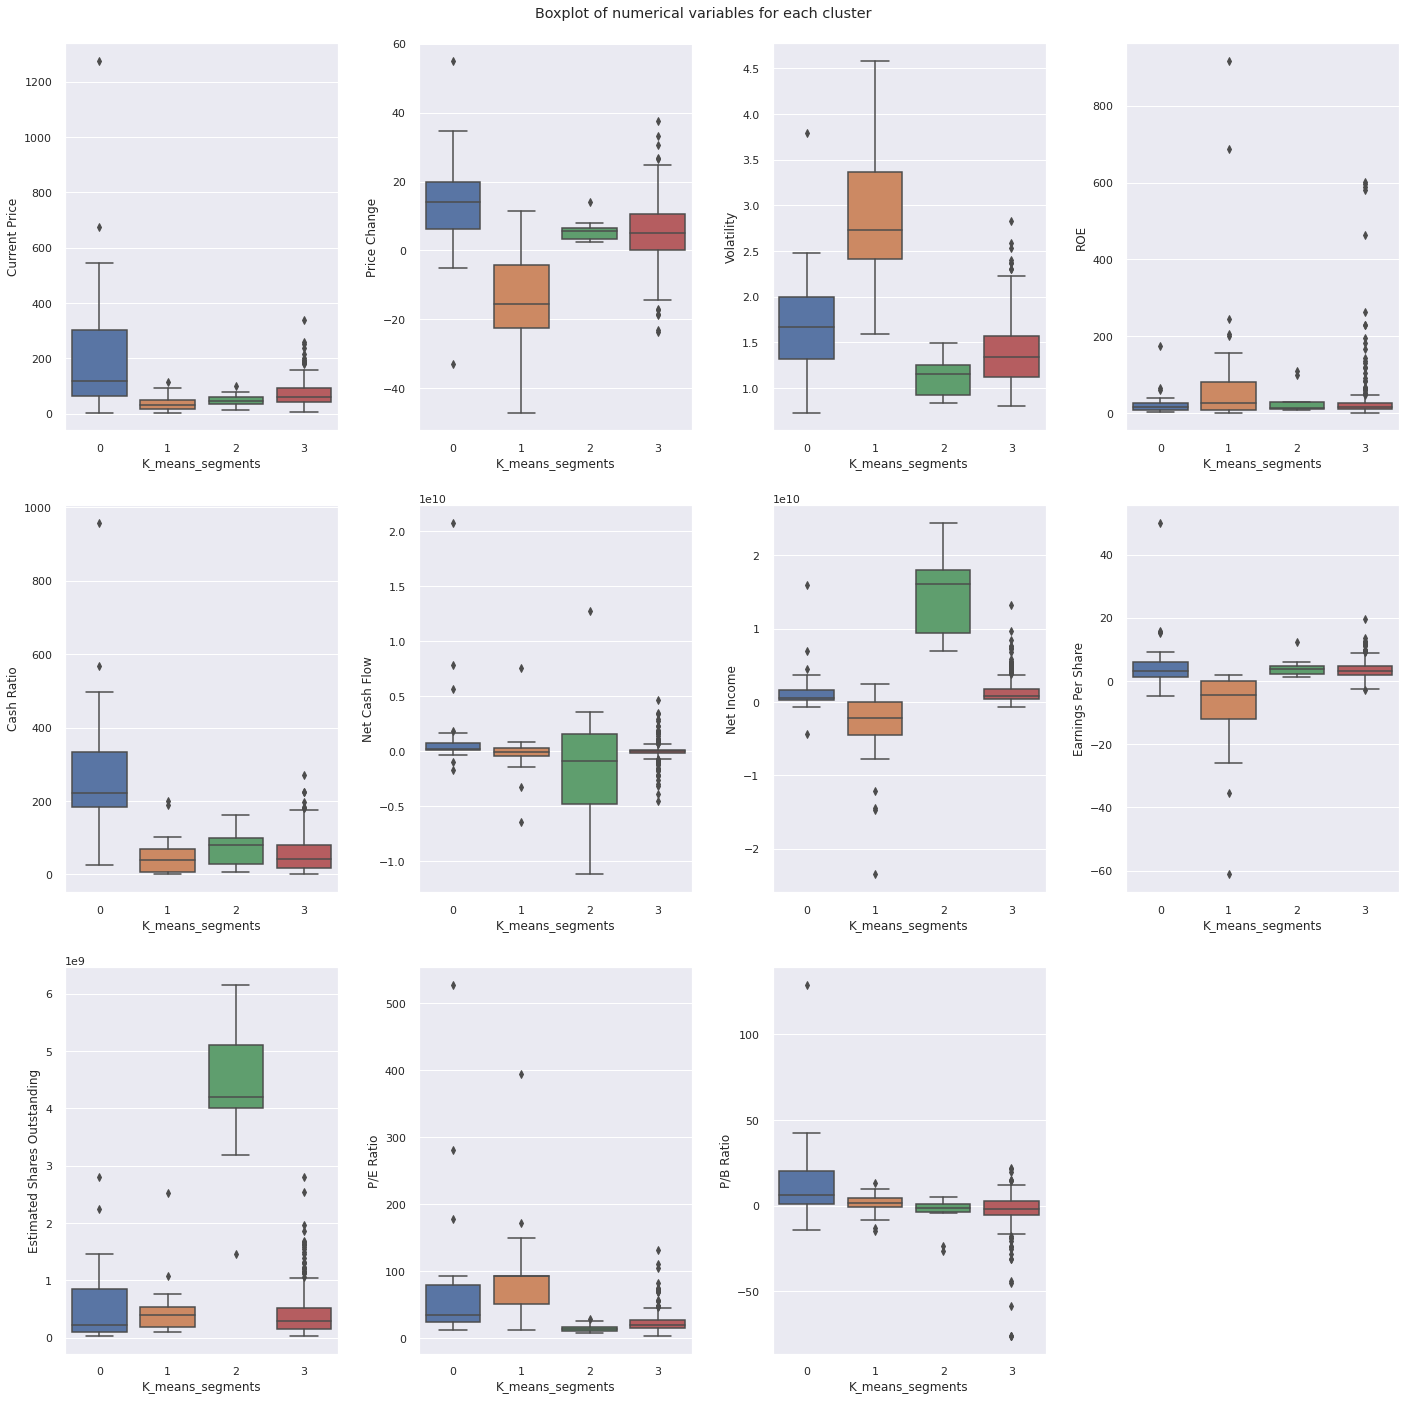

In [217]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

In [142]:
# Names of the companies in each cluster
for cl in df1["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["K_means_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

## **Insights**

- **Cluster 3**
  - This cluster has 277 companies.
  - The Current Price, Volatility, ROE, Cash Ratio, Estimated Shares Outstanding, P/E ratio is from moderate to low. 
  - The Net cash Flow & P/B ratio is negative.
  - The Earnings per share is moderate to high.

- **Cluster 0**
  -  There are 25 companies in this cluster.
  - The Current price, price change,Cash Ratio, Net cash flow,P/B ratio & Earnings Per share is maximum amongst all clusters.
  - The ROE is the lowest.
  - The Net income is from moderate to high.
  - The Estimated shares outstanding is from moderate to low.

- **Cluster 1**
  -  There are 27 companies in this cluster.
   - The Volatility, P/E ratio & ROE is the highest amongst all the clusters.
   - The current price is the least in this cluster & the price change is highly negative.
   - The Net Cash Flow & Net Income is negative .
   - The Earnings per share is highly negative.

- **Cluster 2**
   - There are 11 companies in this cluster.
   - The Net Income & Estaimated Shares Outstanding is the highest amongst the clusters.
   - The Net Cash Flow & P/B ratio is highly negative.
   - The volatility is the least for this cluster.
   - The Current price & Price change is moderate.


## Hierarchical Clustering

In [129]:
hc_df = subset_scaled_df.copy()

**Checking Cophenetic Correlation**

In [143]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [144]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**Checking different Linkage Methods with Euclidean Distance only**

In [145]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [146]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


### **Checking Dendograms**

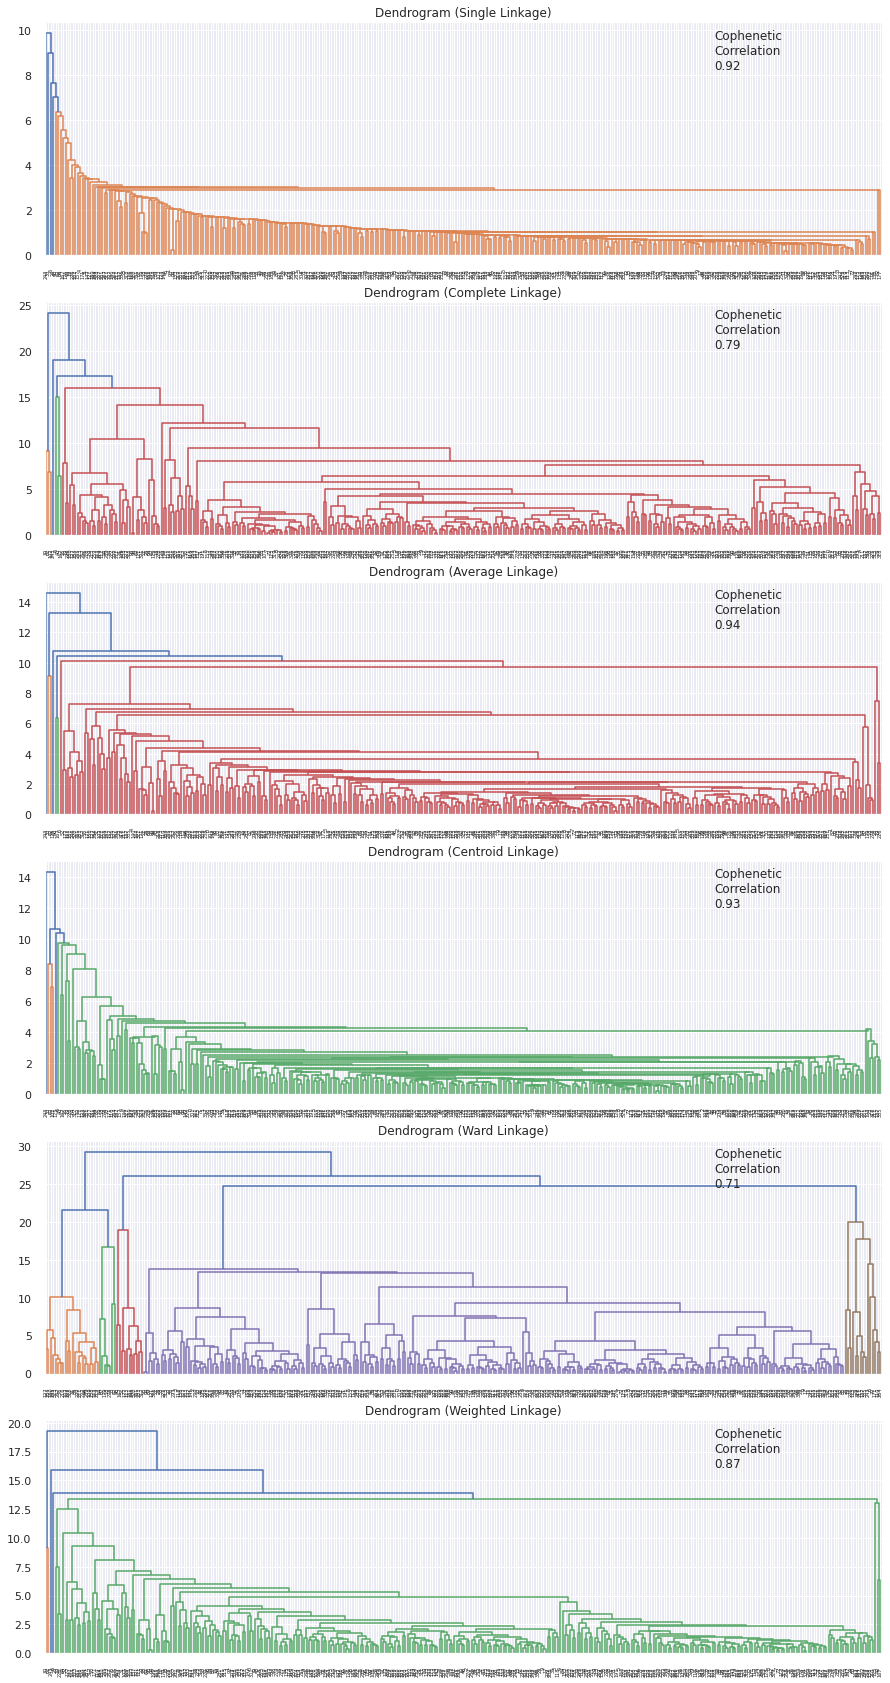

In [147]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare=[]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
    compare.append([method, coph_corr])


In [148]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


**Observation:**
- The cophenetic correlation is highest for average and centroid linkage methods.
- We w4ill move ahead with average linkage.
- 5 appears to be the appropriate number of clusters from the dendrogram for average linkage.

### **Model**

In [190]:
df2=df.copy()

In [191]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [192]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_

**Cluster Profiling**

In [193]:
cluster_profile = df2.groupby("HC_Clusters").mean()

In [194]:
cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_Clusters")["Security"].count().values
)

In [195]:
# let's see the names of the companies in each cluster
for cl in df2["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New Y

**Observation:**

- It can be seen that Cluster 0 has a large no. of companies. Whereas, Cluster 2 & 1 have only 2 companies & Cluster 3 & 4 has only 1 company.
- There is not much of variability in the clusters & hence we will be choosing the Ward linkage for the final model.

### **Final Model**

In [203]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [204]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_

**Cluster Profiling**

In [205]:
cluster_profile = df2.groupby("HC_Clusters").mean()

In [206]:
cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_Clusters")["Security"].count().values
)

In [207]:
# let's see the names of the companies in each cluster
for cl in df2["HC_Clusters"].unique():
    print(
        "The",
        df2[df2["HC_Clusters"] == cl]["Security"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(df2[df2["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 275 companies in cluster 2 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Boeing Company' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 'Carnival Corp.

**Observation:**

- Good variability can be seen among the clusters here.

In [208]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,213.518640,15.252913,1.779861,22.333333,258.740741,1504052814.814815,1716529851.851852,5.177407,689838338.441482,78.441603,13.022590,27
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,72.421687,4.563230,1.403434,25.218182,55.014545,72801872.727273,1572467469.090909,3.728564,445003946.148764,24.188244,-2.966949,275
3,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22


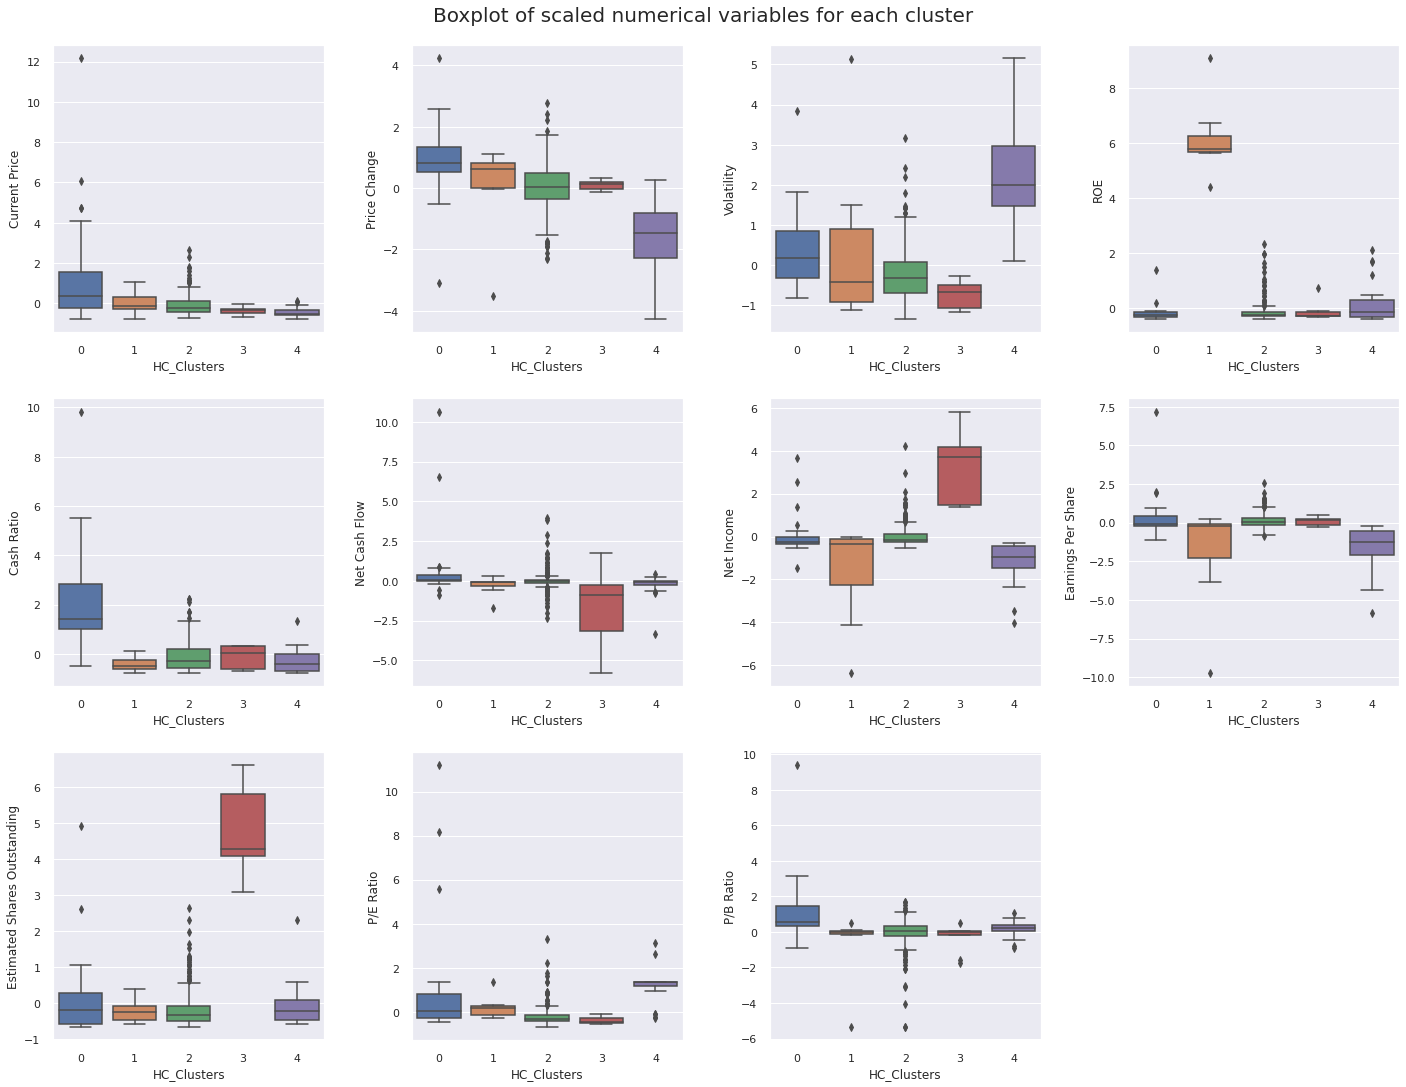

In [209]:
plt.figure(figsize=(20,20))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=subset_scaled_df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

## **Insights**
 We will look into the clusters 0,2 & 4 as the other clusters have 7& 9 countries only.
 
- **Cluster 0**
  - There are 27 companies in this cluster.
  - The Current price,Price Change,Cash ratio, Net Cash Flow,Earnings per share & P/B ratio is maximum for this cluster.
  - The ROE is the lowest in this cluster.
  - The P/E ratio,Estimated Shares Outstanding, Net Income & Volatility is moderate to high.

- **Cluster 2**
  - There are 275 companies in this cluster.
  - The Current Price, Volatility, ROE,Cash ratio,Estimated Shares Outstanding & P/E ratio is low.
  - The Price Change, Net Cash Flow, Net Income, Earnings Per Share & P/B ratio is moderate.

- **Cluster 4**
  - There are 22 companies in the cluster.
  - The Volatility & P/E ratio is highest in this cluster.
  - The Current Price, Cash ratio & Estimated Shares Outstanding is low in this cluster.
  - The Price change is the highest negatively.
  - The Net cash Flow,Net income & Earnings per share are negative & moderate.


  

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

- It can be seen that K means clustering was more time efficient in terms of execution in comparison to Hierarchial Clustering.

- Both the Clustering Techniques gave similar type of clusters. It is to be noted that in K clustering we chose 4 as the no. of clusters & 5 as the value for K in Hierarchial clustering.

- The cluster with 27 companies in both Hierarchial & K clustering have similar performance in terms of the variables having the highest value but the values differ by a small no.



## Recommendations

- From K clustering it can be seen that 

Companies in Cluster 0 have a good performance in terms of Net Cash Flow , Earnings per share & has had a high positive change in share price. This implies it is good to invest in these companies & can obtain a profitable return though the current price of the stock is the highest.

Companies in Cluster 1 have the poor performance amongst all clusters in terms of Earnings per share & Net cash flow but have the best ROE. It is risky to invest in these companies but are more afordable.

- From Hierarchial clustering it can be seen that

Companies in Cluster 2 have an average performance & are a safe option.

Companies in Cluster 4 are risky as the volatility in change of share prices is high.